In [29]:
from main_ennio import *

VOTES_PATH = "../4.1/data/votes.dat"
PARTIES_PATH = "../4.1/data/mpparty.dat"
GENDERS_PATH = "../4.1/data/mpsex.dat"
DISTRICTS_PATH = "../4.1/data/mpdistrict.dat"
NAMES_PATH = "../4.1/data/mpnames.txt"

MAX_EPOCHS = 100

parties_names = {-1: '', 0: 'np', 1: 'm', 2: 'fp', 3: 's', 4: 'v', 5: 'mp', 6: 'kd', 7: 'c'}
gender_names = {-1: '', 0: 'm', 1: 'f'}

In [37]:
def heatmap(grid):
    grid = np.array(grid)

    fig, ax = plt.subplots()
    im = ax.imshow(grid, cmap='Greens')
    
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            text = ax.text(j, i, grid[i, j],
                        ha="center", va="center", color="w")
    ax.set_title("Distribution of districts")
    fig.tight_layout()
    plt.show()

In [ ]:
# load data
# 0 = no-vote; 1 = yes-vote; 0.5 = missing vote
# each row -is one mp; each col is one vote
votes_mps = get_votes(VOTES_PATH, VOTES_SHAPE)
# each elem of parties, genders, names is the party, gender, name of the correspondent mp

# 0=no party, 1='m', 2='fp', 3='s', 4='v', 5='mp', 6='kd', 7='c'
parties = get_parties(path=PARTIES_PATH)
# Male 0, Female 1
genders = get_genders(path=GENDERS_PATH)
districts = get_districts(path=DISTRICTS_PATH)
names = get_names(path=NAMES_PATH)

w = init_weights((10, 10, 31))

for epoch in range(MAX_EPOCHS):
    neigh_size = 2 - 2/MAX_EPOCHS*epoch
    print(f'EPOCH {epoch} neigh_distance {round(neigh_size)}')
    for votes in votes_mps:
        w, _ = update_weights(votes, w, neigh_size, LR, epoch)

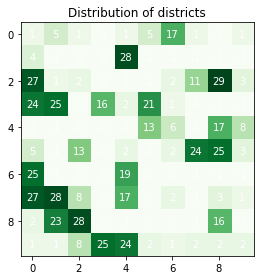

In [38]:
grid = [[[] for _ in range(w.shape[1])] for _ in range(w.shape[0])]
for idx, votes in enumerate(votes_mps):
    i, j = get_node(votes, w)
    grid[i][j].append(int(districts[idx]))
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        if len(grid[i][j]) > 0:
            grid[i][j] = most_common(grid[i][j])
        else:
            grid[i][j] = -1
heatmap(grid)